<center>
    COMP4600/5500 - Reinforcement Learning

# Homework 3 - Dynamic Programming

### Due: Monday, October 4th 11:59 pm
    
</center>

Student Name: Mohamed Martini

The purpose of this project is to study different properties of dynamic programming methods. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt

## Part I
Consider a cleaning robot that must collect an empty can and also has to recharge its batteries.
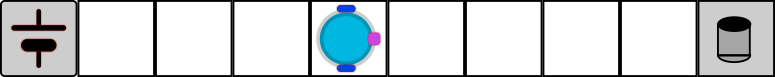

This problem has a discrete state space $S=\{0,…,9\}$, where state $s$ describes the position of the robot in the corridor. The robot has only two actions $A=\{-1,1\}$ for going one step to the left or right. States $0$ and $9$ are terminal, meaning that once the robot reaches either of them it can no longer leave, regardless of the action, and the episode ends. We assume this is a deterministic environment with $\gamma=0.9$.



In [15]:
class QLearner:
    """
    base class for a Q learner class with value iteration method
    child classes shall only provide their custom dynamics
    """
    def __init__(self, 
                 S,  # set of states
                 A,  # set of actions
                 gamma):  # discount parameter
        self.S = S
        self.num_states = S.shape[0]

        self.A = A
        self.num_actions = A.shape[0]
        
        self.gamma = gamma
        
        self.V = np.zeros(self.num_states)  # 9 states
        self.Q = np.zeros((self.num_actions, self.num_states))  # 9 states and two actions per state

    def dynamic_a(self, s):
        """return possible actions and their probabilities given a state s"""
        return ([None], [None])
    
    def dynamic_s_pr(self, s, a):
        """return possible states and their probabilities given state s and action a"""
        return ([None], [None])
    
    def dynamic_r(self, s, a, s_pr):
        """return possible rewards and their probabilities given state s and action a and next state s_pr"""
        return ([None], [None])
    
    def v_iteration(self, thresh=0.01):
        """value iteration algorithm"""
        while True:
            delta = 0
            for s in range(self.num_states):
                v_s = 0
                A = self.dynamic_a(s)
                for a in np.where(A>0)[0]:
                    p_a = A[a]
                    
                    q_as = 0
                    S_pr = self.dynamic_s_pr(s, a)
                    for s_p in np.where(S_pr>0)[0]:
                        p_s_p = S_pr[s_p]
                        
                        R = self.dynamic_r(s, a, s_p)
                        for r in np.where(R>0)[0]:
                            p_r = R[r]
#                         for r, p_r in enumerate(R):
                            
                            q = p_s_p * p_r * (r + self.gamma * self.V[s_p])
                            q_as += q
                            v_s += p_a * q
#                             if s == 49 and s_p == 98: print(f"{q := }")
#                                 print(f"s:\t{s}\ta:\t{a}\\{p_a}\ts':\t{s_p}\\{p_s_p}\tr:\t{r}\\{p_r}\t")
#                                 print(f"q:\t{q}\tv_s:\t{v_s}\t")
#                                 if input():
#                                     return np.zeros(self.num_states), np.zeros(self.num_states)
                            
                    self.Q[a, s] = q_as
#                     if s == 49:
#                         print(f"self.Q[{a}, {s}] = {q_as}\n")
                old = self.V[s]
                self.V[s] = v_s
#                 if s == 49:
#                     print(f"self.V[{s}] = {old} -> {v_s}\n\n")
                delta = max(delta, self.V[s] - old)
            if delta < thresh:
                break
        return self.V, self.Q
    
    def a_star(self):
        """get optimal policy"""
        Pi_star = np.zeros(self.num_states, dtype=int)  # to hold optimal actions
        for s in range(1, self.num_states - 1):
            Pi_star[s] = self.A[np.argmax(self.Q[:, s])]
        return Pi_star
    

In [16]:
class CleaningRobot(QLearner):
    """Q learner class for problem 1"""
    def __init__(self, 
                 S,  # set of states
                 A,  # set of actions
                 gamma):  # discount parameter
        super(CleaningRobot, self).__init__(S, A, gamma)

    def dynamic_a(self, s):
        """get available actions in state s"""
        if s in (0, 9):
            # no action is taken
            return np.zeros(self.num_actions)
        return np.array([0.5, 0.5])

    def dynamic_s_pr(self, s, a):
        """state-transition function"""
        if s in (0, 9):
            # no action is taken
            return np.zeros(self.num_states)
        S_pr = np.zeros(self.num_states)
        S_pr[s + self.A[a]] = 1
        return S_pr

    def dynamic_r(self, s, a, s_pr):
        """reward function"""
        R = np.zeros(6)
        if s == 8 and a == 1:
            R[5] = 1
        elif s == 1 and a == 0:
            R[1] = 1
        else: R[0] = 1
        return R

In [17]:
def print_1d(array, name):
    """to print a 1d array"""
    print("{} = (".format(name))
    [print(round(n,2), end=",\t") for n in array]
    print("\n)\n")


In [18]:
S = np.array(range(10))
A = np.array((-1, 1), dtype=int)
gamma = 0.9




cr = CleaningRobot(S, A, gamma)
V, Q = cr.v_iteration(thresh=0.01)
Pi_star = cr.a_star()

print_1d(V, "V*")
print_1d(Pi_star, "\u03C0*")

V* = (
0.0,	0.77,	0.6,	0.57,	0.68,	0.94,	1.42,	2.21,	3.49,	0.0,	
)

π* = (
0,	-1,	-1,	1,	1,	1,	1,	1,	1,	0,	
)






<hr>

## Part II (*)
A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of \$100, or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an **undiscounted** ($\gamma=1$), **episodic**, finite MDP.

The state is the gambler’s capital $s \in \{ 1,2,...,99\}$ and the actions are stakes $a \in \{ 0,1,..., min(s, 100-s)\}$. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1. 
The state-value function then gives the probability of winning from each state. 

A policy is mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. 
Let’s p_h denote the probability of the coin coming up heads. If $p_h$ is known the problem can be solved using value iteration.



### II.1
Implement the Gambler’s problem and then implement **value iteration** to solve the MDP for three scenarios where $p_h=\{0.4,0.25,0.55\}$ and find the optimal value function and optimal policy for each scenario.

**Tip**: When implementing, you might find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively.

In [19]:
class Gambler(QLearner):
    """Q learner class for problem 1"""
    def __init__(self, 
                 S,  # set of states
                 A,  # set of actions
                 gamma,  # discount parameter
                 p_h):  # probability of head
        super(Gambler, self).__init__(S, A, gamma)
        self.p_h = p_h

    def dynamic_a(self, s):
        A = np.zeros(self.num_actions)
        if s in (0, 100):
            return A
        """get available actions in state s"""
        biggest_bid = min(s, 100 - s)
        A[1 : biggest_bid + 1] = 1 / biggest_bid
        return A
    
    def dynamic_s_pr(self, s, a):
        """state-transition function"""
        S_pr = np.zeros(self.num_states)
        if s in (0, 100):
            S_pr[0] = 1
            return S_pr
        S_pr[s + a] = self.p_h  # agent wins
        S_pr[s - a] = 1 - self.p_h  # agent loses
        return S_pr
    
    def dynamic_r(self, s, a, s_pr):
        """reward function"""
        R = np.zeros(self.num_states)
        if s + a == 100 and s != 100:
            R[1] = 1
        else:
            R[0] = 1
        return R

In [48]:
S = np.array(range(101))
A = np.array(range(101))
gamma = 1
p_h = 0.4


prob2 = Gambler(S, A, gamma, p_h)
V, Q = prob2.v_iteration(thresh=0.0000000001)
Pi_star = prob2.a_star()

print_1d(V, "V*")
print_1d(Pi_star, "\u03C0*")

V* = (
0.0,	0.0,	0.01,	0.01,	0.02,	0.02,	0.03,	0.03,	0.04,	0.05,	0.06,	0.07,	0.08,	0.09,	0.1,	0.11,	0.12,	0.13,	0.14,	0.16,	0.17,	0.18,	0.19,	0.21,	0.22,	0.24,	0.25,	0.27,	0.28,	0.3,	0.31,	0.33,	0.35,	0.36,	0.38,	0.4,	0.41,	0.43,	0.45,	0.47,	0.49,	0.51,	0.53,	0.55,	0.57,	0.59,	0.61,	0.63,	0.66,	0.68,	0.71,	0.73,	0.74,	0.76,	0.78,	0.8,	0.82,	0.84,	0.86,	0.88,	0.9,	0.93,	0.95,	0.97,	1.0,	1.02,	1.04,	1.07,	1.09,	1.12,	1.15,	1.17,	1.2,	1.23,	1.25,	1.28,	1.31,	1.34,	1.37,	1.4,	1.43,	1.46,	1.49,	1.53,	1.56,	1.6,	1.63,	1.67,	1.71,	1.75,	1.79,	1.84,	1.88,	1.93,	1.99,	2.04,	2.11,	2.17,	2.25,	2.35,	0.0,	
)

π* = (
0,	1,	2,	3,	4,	5,	6,	7,	8,	9,	10,	11,	12,	13,	14,	15,	16,	17,	18,	19,	20,	21,	22,	23,	24,	25,	26,	27,	28,	29,	30,	31,	32,	33,	34,	35,	36,	37,	38,	39,	40,	41,	42,	43,	44,	45,	46,	47,	48,	49,	50,	49,	48,	47,	46,	45,	44,	43,	42,	41,	40,	39,	38,	37,	36,	35,	34,	33,	32,	31,	30,	29,	28,	27,	26,	25,	24,	23,	22,	21,	20,	19,	18,	17,	16,	15,	14,	13,	12,	11,	10,	9,	8,	7,	6,	5,	4,	3,	2,	1,	0,	
)



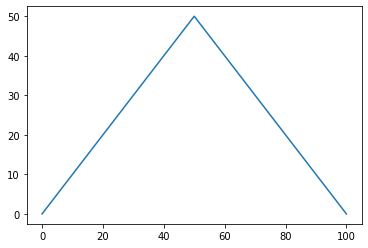

In [49]:
plt.plot(Pi_star)

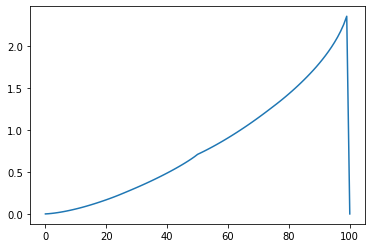

In [50]:
plt.plot(V)

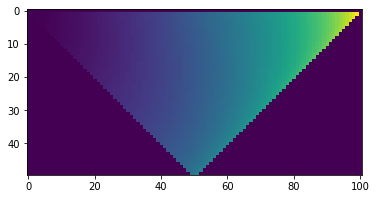

In [52]:
plt.imshow(Q[:50])

In [51]:
assert False

AssertionError: 

### II.2
For all three scenarios:
1. Plot the change in the value function over successive sweeps of value iteration w.r.t capital (state).
2. Plot the final policy w.r.t capital (state). 



In [ ]:
# Your code here

### II.3
Answer the following questions:
1. What action does your optimal policy suggest for capital of 50? What about for capital of 51?
> Answer:

2. Why do you think your optimal policy is a good policy? Explain.
> Answer:
    


## Part III (extra credit)
Test the algorithm by decreasing $\theta$ the threshold for accuracy of value function estimation. What happens when $\theta \rightarrow 0$? You can add any helpful code/graphs if you have.

> Answer